In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Question #2

In [ ]:
# read csv
file_path = "2_YeastCycle.csv"
data = np.genfromtxt(file_path, delimiter=",")

## Part A

In [16]:
# singular value decomp
svd = np.linalg.svd(data)

# obtain svd matrices
U = svd[0]
S_vec = svd[1]
S = S_vec * np.identity(S.shape[0])
Vt = svd[2]

# (i) plot first two rows of F = matmul(Σ, V_t)
F = np.matmul(S, Vt)

# print(f"Data: {data}")
print(f"U: {U.shape}")
print(f"S: {S.shape}")
# print(f"S: {S}")
print(f"Vt: {Vt.shape}")
# print(f"Vt: {Vt}")

print(f"F: {F.shape}")
print("First 2 rows of F:", F[:2])

U: (678, 678)
S: (12, 12)
Vt: (12, 12)
F: (12, 12)
First 2 rows of F: [[ -5.04364799 -19.30436682 -17.00822924   1.30074591  11.72791997
   13.53743053  -6.07965326 -12.35554278  -7.15915187   6.18387842
   10.25206923   4.98817392]
 [-10.87058151  -7.45483727  10.33328024  13.67882688   6.85034916
   -5.80003526  -8.40851796   3.06883544   8.90183657   7.69342273
    0.94257836  -9.88651709]]


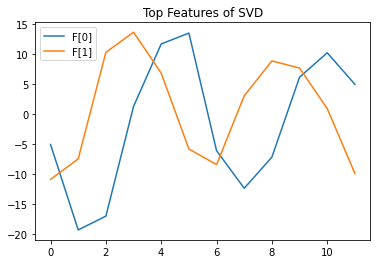

In [88]:
plt.plot(F[0], label='F[0]')
plt.plot(F[1], label='F[1]')
# plt.plot(F[2], label='F[2]')
# plt.plot(F[3], label='F[3]')
plt.title("Top Features of SVD")
plt.legend()

Text(0.5, 1.0, 'All Features of SVD')

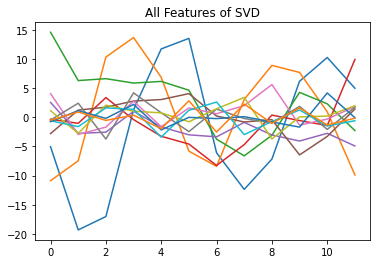

In [47]:
for i in range(12):
	plt.plot(F[i])
plt.title("All Features of SVD")

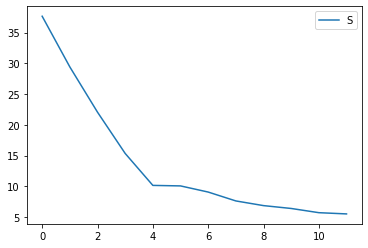

In [41]:
plt.plot(S_vec, label = 'S')
plt.legend()

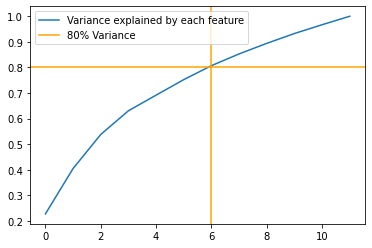

In [42]:
plt.plot(np.cumsum(S_vec)/np.sum(S_vec), label='Variance explained by each feature')
plt.axhline(0.8, label='80% Variance', color='orange')
plt.axvline(6, color='orange')
plt.legend()

## Part B

3: -2148.2997153988304
4: -1921.0651784420122
5: -1774.480851556624
6: -1624.4856017315446


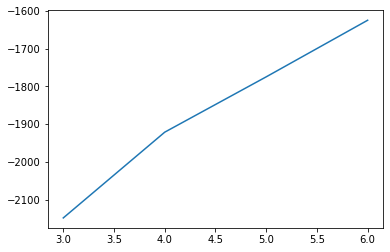

In [48]:
k_score = []
for n_clusters in [3, 4, 5, 6]:
	kmeans = KMeans(n_clusters=n_clusters).fit(data)
	score = kmeans.score(data)
	k_score.append(score)
	print(f"{n_clusters}: {score}")

plt.plot(range(3,7), k_score)

In [84]:
k_score = []
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters)
cluster_indices = kmeans.fit_predict(data)

cluster_means = []

for cluster_name in range(n_clusters):
	cluster_means.append(np.mean(data[cluster_indices == cluster_name], axis=0))

print(cluster_means[0].shape)

(12,)


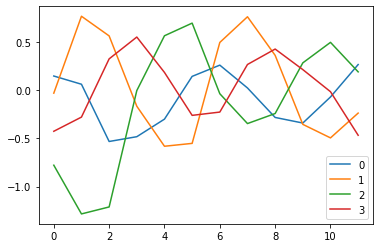

In [85]:
for cluster_num, cluster in enumerate(cluster_means):
	plt.plot(cluster, label=cluster_num)
plt.legend()